## SOMMAIRE <span id='som'>
   
- [Premieres analyse CA ](#m1)
- [Les catégories ](#m2)
- [Le genre ](#m3)
- [L'age](#m4)   

In [3]:
import pandas as pd
import numpy as np
from os import getcwd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from scipy.stats import linregress

# Premieres analyse CA

In [38]:
data = pd.read_csv("../sales/data_values_clear/merge.csv", parse_dates=True)
data['sell_day'] = pd.DatetimeIndex(data['date']).day.astype(int)
data.head()

,id_product,date,session_id,client_id,sex,user_birthday,price,category_id,transaction_date,year,month,user_age,order,sell_year,sell_month,month_string,binning_age,sell_day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0,2021-04-10,2021,4,44,1,2021,4,Avril,"(40.0, 50.0]",10
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2,2022-02-03,2022,2,22,1,2022,2,Fevrier - 2022,"(20.0, 30.0]",3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1,2021-09-23,2021,9,42,1,2021,9,Septembre,"(40.0, 50.0]",23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0,2021-10-17,2021,10,58,1,2021,10,Octobre,"(50.0, 60.0]",17
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0,2021-07-17,2021,7,41,1,2021,7,Juillet,"(40.0, 50.0]",17


In [39]:
gp_month = data.groupby(['month']).sum().reset_index()
gp_month.head()

,month,user_birthday,price,category_id,year,user_age,order,sell_year,sell_month,sell_day
0,1,57966524,523008.488581,15300,59276952,1310428,29316,59276952,29316,462036
1,2,58480719,532857.872878,14129,59784474,1303755,29567,59784474,59134,431030
2,3,56502988,479407.751446,11764,57735928,1232940,28568,57735928,85704,454870
3,4,56208404,473129.620027,10581,57426715,1218311,28415,57426715,113660,443539
4,5,55867629,489453.035730,11413,57083145,1215516,28245,57083145,141225,451552


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

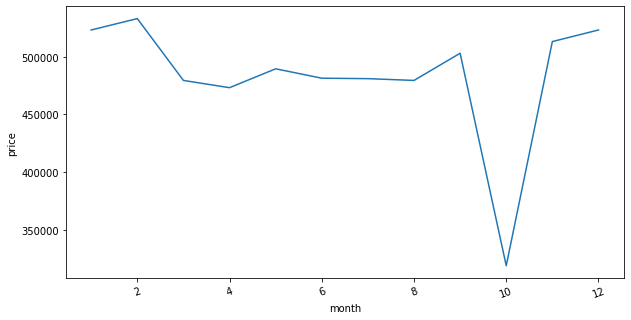

In [40]:
fig, ax = plt.subplots(figsize=[10,5])
sns.lineplot(x="month", y="price",data=gp_month)
plt.xticks(rotation=20)

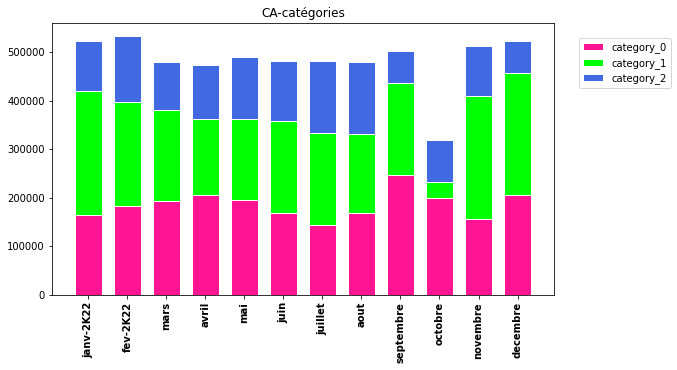

In [41]:
categoriesMonth = data.groupby(['month','category_id']).sum()['price'].reset_index()
moyenne = data['category_id'].sum().mean();
caCat0 = data[data['category_id'] == 0].groupby(['month']).sum()['price']
caCat1 = data[data['category_id'] == 1].groupby(['month']).sum()['price']
caCat2 = data[data['category_id'] == 2].groupby(['month']).sum()['price']
monthName = ['janv-2K22','fev-2K22','mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre']


fig, ax = plt.subplots(figsize=[9,5])

## on supperpose les catégorie (il faut prendre la diffenrence entre la categorie)
caSumCat = data[data['category_id'] != 2].groupby(['month']).sum()['price']

monthLine = [0,1,2,3,4,5,6,7,8,9,10,11]
month = ['mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre']

barWidth = 0.7
postition0 = plt.bar(monthLine, caCat0, color='deeppink', edgecolor='white', width=barWidth)
postition1 = plt.bar(monthLine, caCat1, bottom=caCat0, color='lime', edgecolor='white', width=barWidth)
postition2 = plt.bar(monthLine, caCat2, bottom=caSumCat, color='royalblue', edgecolor='white', width=barWidth)

plt.xticks(monthLine, monthName, fontweight='bold', rotation=90)
plt.title('CA-catégories')
plt.legend((postition0[0],postition1[0], postition2[0]), ('category_0', 'category_1','category_2'), loc=[1.05,0.76])

plt.show()


In [45]:
# on récuper le mois d'octobre et on reformate le DF pour obtenir en colonne les catégorie et leur CA 
octDf = data.loc[data.month == 10, ['transaction_date', 'price', 'category_id']]
octDf = octDf.groupby([octDf.transaction_date, 'category_id']).agg({'price':['sum']}).reset_index()
octDf.columns = ['date', 'category', 'ca']
octDf.loc[octDf.category =='0.0', 'category'] = 0
octDf.loc[octDf.category =='1.0', 'category'] = 1
octDf.loc[octDf.category =='2.0', 'category'] = 2
octDf['day'] = pd.DatetimeIndex(octDf['date']).day
octDf  = octDf[['day','category','ca']]
df = pd.pivot_table(octDf, columns=['category'], index=['day']).reset_index()
df.columns = ['date', 'cat_0', 'cat_1', 'cat_2']
df = df[['date','cat_0','cat_1','cat_2']]
df.head(1)

,date,cat_0,cat_1,cat_2
0,1,6947.51,7003.79,2958.06


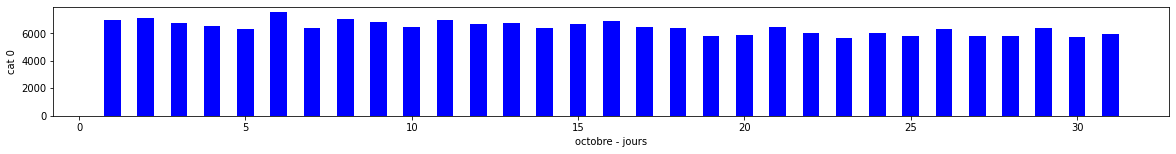

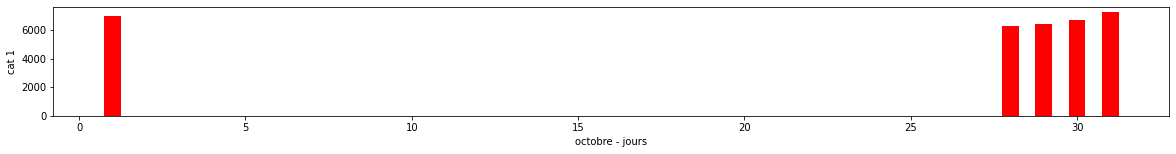

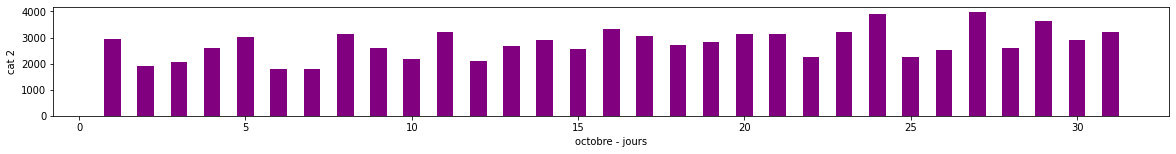

In [46]:
color=['blue', 'red', 'purple']
for i, cat in enumerate([0,1,2]):
    plt.figure(figsize=(44,2))
    plt.subplot(1,2,2)
    plt.bar(df['date'], df[f'cat_{cat}'], width=0.5, color=color[i])
    plt.xlabel('octobre - jours')
    plt.ylabel(f'cat {cat}')
    plt.show()

In [ ]:
Suppressions des lignes d'octobre

In [48]:
data.describe()

,user_birthday,price,category_id,year,month,user_age,order,sell_year,sell_month,sell_day
count,336816.000000,336816.000000,336816.000000,336816.000000,336816.000000,336816.000000,336816.0,336816.000000,336816.000000,336816.000000
mean,1977.823396,17.213176,0.430024,2021.174822,6.482133,43.351426,1.0,2021.174822,6.482133,15.801628
std,13.523923,17.853086,0.591039,0.379816,3.519807,13.532093,0.0,0.379816,3.519807,8.818357
min,1929.000000,0.620000,0.000000,2021.000000,1.000000,17.000000,1.0,2021.000000,1.000000,1.000000
25%,1971.000000,8.610000,0.000000,2021.000000,3.000000,34.000000,1.0,2021.000000,3.000000,8.000000
50%,1980.000000,13.900000,0.000000,2021.000000,6.000000,42.000000,1.0,2021.000000,6.000000,16.000000
75%,1987.000000,18.990000,1.000000,2021.000000,9.000000,51.000000,1.0,2021.000000,9.000000,23.000000
max,2004.000000,300.000000,2.000000,2022.000000,12.000000,93.000000,1.0,2022.000000,12.000000,31.000000


In [50]:
data = data.loc[data.sell_month != 10]
data.describe()

,user_birthday,price,category_id,year,month,user_age,order,sell_year,sell_month,sell_day
count,315232.000000,315232.000000,315232.000000,315232.000000,315232.000000,315232.000000,315232.0,315232.000000,315232.000000,315232.000000
mean,1977.751983,17.379070,0.446823,2021.186793,6.241264,43.434810,1.0,2021.186793,6.241264,15.773313
std,13.604129,17.862573,0.592598,0.389746,3.511689,13.611744,0.0,0.389746,3.511689,8.777316
min,1929.000000,0.620000,0.000000,2021.000000,1.000000,17.000000,1.0,2021.000000,1.000000,1.000000
25%,1970.000000,8.990000,0.000000,2021.000000,3.000000,34.000000,1.0,2021.000000,3.000000,8.000000
50%,1980.000000,13.990000,0.000000,2021.000000,6.000000,42.000000,1.0,2021.000000,6.000000,16.000000
75%,1987.000000,19.040000,1.000000,2021.000000,9.000000,51.000000,1.0,2021.000000,9.000000,23.000000
max,2004.000000,300.000000,2.000000,2022.000000,12.000000,93.000000,1.0,2022.000000,12.000000,31.000000


In [52]:
data.to_csv("data_values_clear/clear.csv", index = False, header=True)

In [4]:
data = pd.read_csv("../sales/data_values_clear/clear.csv", parse_dates=True)

<a id="m1" class="btn btn-default" href="#som"></a>

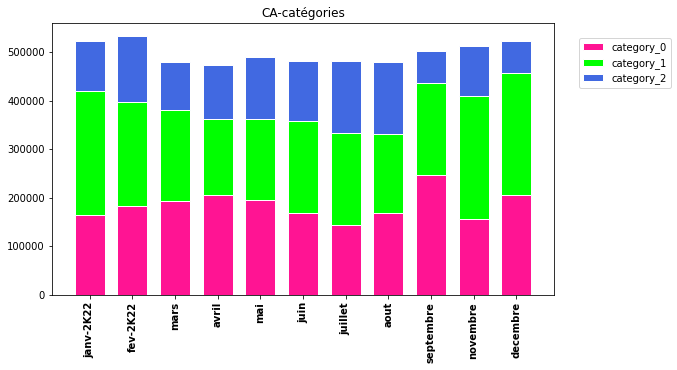

In [10]:
categoriesMonth = data.groupby(['month','category_id']).sum()['price'].reset_index()
moyenne = data['category_id'].sum().mean();
cat0 = data[data['category_id'] == 0].groupby(['month']).sum()['price']
cat1 = data[data['category_id'] == 1].groupby(['month']).sum()['price']
cat2 = data[data['category_id'] == 2].groupby(['month']).sum()['price']
monthName = ['janv-2K22','fev-2K22','mars','avril','mai','juin','juillet','aout','septembre','novembre','decembre']


fig, ax = plt.subplots(figsize=[9,5])

## on supperpose les catégorie (il faut prendre la diffenrence entre la categorie)
caSumCat = data[data['category_id'] != 2].groupby(['month']).sum()['price']

monthLine = [0,1,2,3,4,5,6,7,8,9,10]
month = ['mars','avril','mai','juin','juillet','aout','septembre','octobre','decembre']

barWidth = 0.7
postition0 = plt.bar(monthLine, cat0, color='deeppink', edgecolor='white', width=barWidth)
postition1 = plt.bar(monthLine, cat1, bottom=caCat0, color='lime', edgecolor='white', width=barWidth)
postition2 = plt.bar(monthLine, cat2, bottom=caSumCat, color='royalblue', edgecolor='white', width=barWidth)

plt.xticks(monthLine, monthName, fontweight='bold', rotation=90)
plt.title('CA-catégories')
plt.legend((postition0[0],postition1[0], postition2[0]), ('category_0', 'category_1','category_2'), loc=[1.05,0.76])

plt.show()


Text(0.5, 1.0, 'Ca des vente par client')

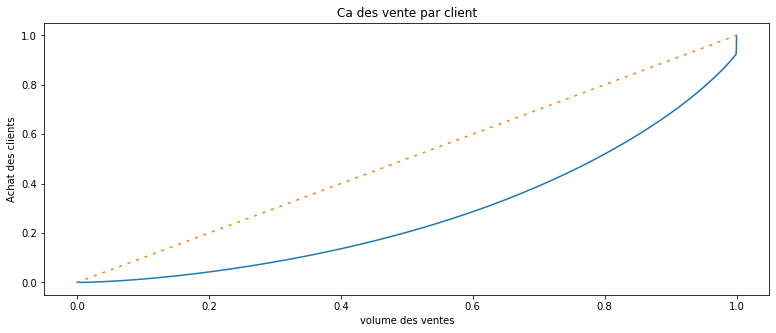

In [31]:
clientPrice = data.groupby(by=["client_id"]).sum().sort_values('price',ascending=False)
fig, (ax) = plt.subplots(1,1,figsize=(13,5))
depenses = clientPrice.loc[clientPrice['price'] != 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0], lorenz)
plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4])
plt.xlabel('volume des ventes')
plt.ylabel('Achat des clients')
plt.title('Ca des vente par client')

# Les  categories 

<a id="m2" class="btn btn-default" href="#som"> retour au sommaire </a>

In [13]:
category0 = data[data.category_id == 0]
category1 = data[data.category_id == 1]
category2 = data[data.category_id == 2]

In [10]:
data.groupby(['category_id']).sum()

,user_birthday,price,year,month,user_age,order,sell_year,sell_month
category_id,,,,,,,,
0,414469706,2.230818e+06,423490768,1377721,9021062,209529,423490768,1377721
1,216654296,2.247384e+06,221797454,697786,5143158,109735,221797454,697786
2,35038563,1.319471e+06,35475797,107779,437234,17552,35475797,107779


([<matplotlib.axis.XTick at 0x7fee389078e0>,
 [Text(1, 0, 'cat0'), Text(2, 0, 'cat1'), Text(3, 0, 'cat2')])

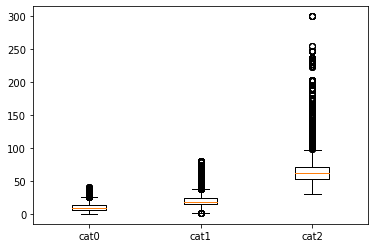

In [15]:
category0Price = category0['price'].tolist()
category1Price = category1['price'].tolist()
category2Price = category2['price'].tolist()
mergeCategoryPrice = [category0Price,category1Price,category2Price]

mergeCategoryPrice
BoxName = ['cat0', 'cat1', 'cat2']
plt.boxplot(mergeCategoryPrice)
plt.xticks([1,2,3], BoxName)

In [12]:
outliers = data.loc[data.category_id == 2].loc[data.price > 105]
outliers = outliers[['price','id_product']].drop_duplicates()
outliers.price.mean()

151.35009615384615

In [20]:
category0['price'].count()

190771

([<matplotlib.patches.Wedge at 0x7fee39d00af0>,
 [Text(0.434254186929809, 1.010654887255749, 'category_0'),
  Text(-0.9867564728280335, -0.4861189806333205, 'category_1'),
  Text(0.8361832208732124, -0.7147010711689893, 'category_2')],
 [Text(0.23686592014353214, 0.5512663021394995, '37.1%'),
  Text(-0.5382308033607455, -0.26515580761817475, '40.4%'),
  Text(0.4560999386581158, -0.3898369479103577, '22.5%')])

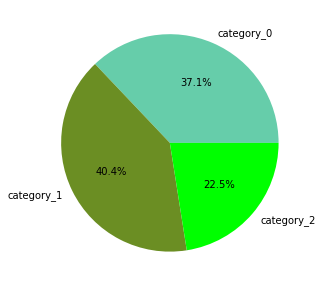

In [24]:
labelPie = ['category_0', 'category_1', 'category_2']
pieValues = [category0['price'].sum(),category1['price'].sum(),category2['price'].sum()]
colorsPie = ['mediumaquamarine','olivedrab','lime']
plt.figure(figsize=[5,5])
plt.pie(pieValues,labels=labelPie,autopct="%.1f%%",colors=colorsPie)

# Le Genre 

<a id="m3" class="btn btn-default" href="#som"> retour au sommaire </a>

([<matplotlib.patches.Wedge at 0x7fee39e548b0>,
 [Text(0.021575005618187846, 1.099788397434968, 'women'),
  Text(-0.021575108587808693, -1.0997883954149654, 'men')],
 [Text(0.011768184882647914, 0.5998845804190734, '49.4%'),
  Text(-0.01176824104789565, -0.5998845793172538, '50.6%')])

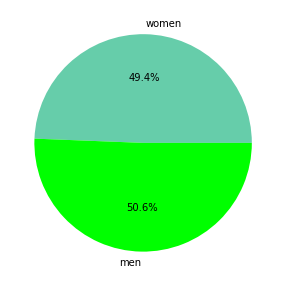

In [26]:
caWomen = data.loc[data['sex'] == 'f']['price'].sum()
caMen = data.loc[data['sex'] == 'm']['price'].sum()
labelPieSex = ['women', 'men']
pieValuesSex = [caWomen,caMen]
colorsPieSex = ['mediumaquamarine','lime']
plt.figure(figsize=[5,5])
plt.pie(pieValuesSex, labels = labelPieSex, autopct="%.1f%%", colors=colorsPieSex)

In [27]:
#on decoupe par cat et par genre
catAgeCor = pd.crosstab(data.user_age, data.category_id).reset_index() 
catAgeCor = catAgeCor.rename(index=str, columns={0: "category_0",1: "category_1",2: "category_2" })
sexeAge = data.groupby(['sex','category_id','user_age']).sum().reset_index()
sexeAgeCat0 = sexeAge[sexeAge.category_id == 0][['sex','user_age','price']]
sexeAgeCat1 = sexeAge[sexeAge.category_id == 1][['sex','user_age','price']]
sexeAgeCat2 = sexeAge[sexeAge.category_id == 2][['sex','user_age','price']]

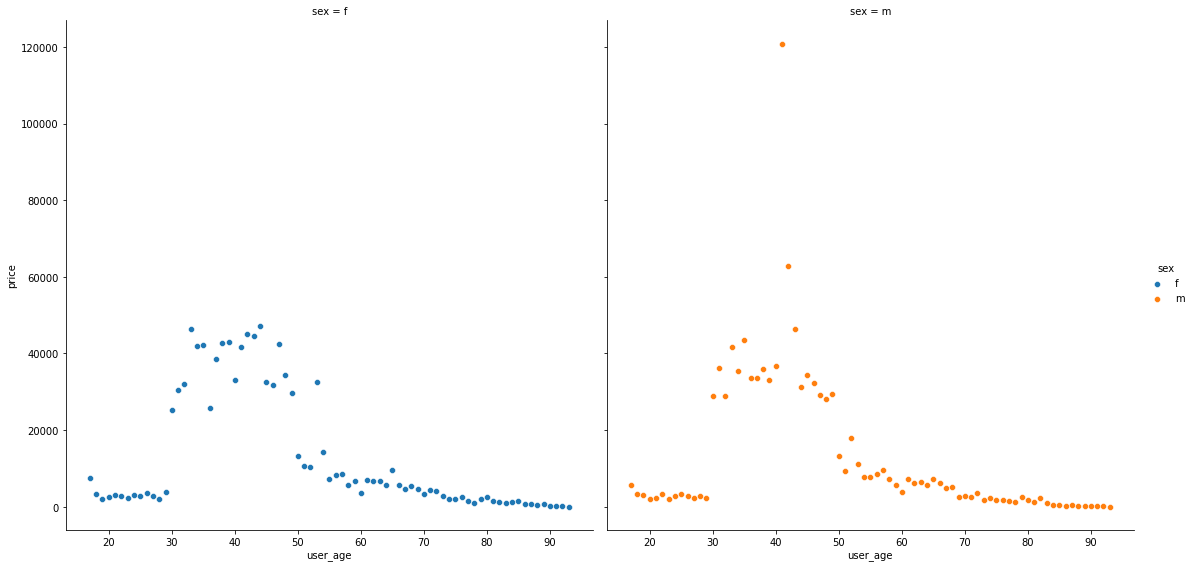

In [28]:
plotCat0 = sns.FacetGrid(sexeAgeCat0, col="sex", hue="sex",height=8)
plotCat0.map(sns.scatterplot, "user_age",'price', alpha=1)
plotCat0.add_legend()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

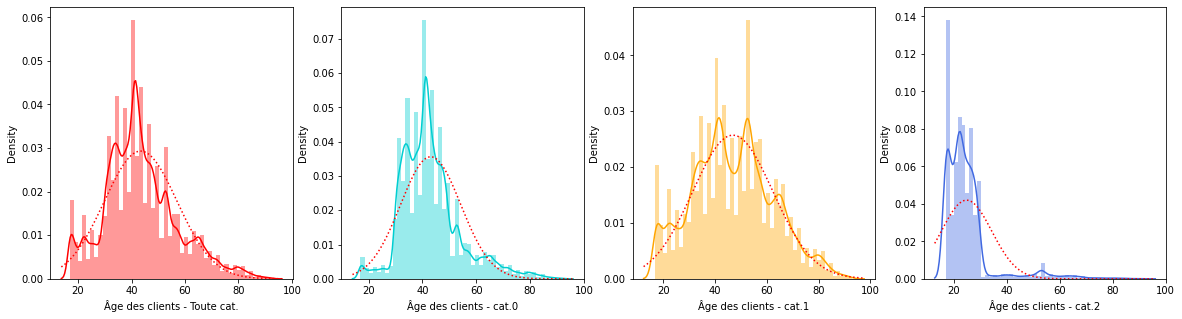

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))

courbeTtCat  = pd.Series(data.user_age, name="Âge des clients - Toute cat.")
x0 = pd.Series(category0.user_age, name="Âge des clients - cat.0")
x1 = pd.Series(category1.user_age, name="Âge des clients - cat.1")
x2 = pd.Series(category2.user_age, name="Âge des clients - cat.2")

sns.distplot(courbeTtCat, color="r", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x0, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1 , color="orange", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

plt.show()

# L'âge

<a id="m2" class="btn btn-default" href="#som"> retour au sommaire </a>

<AxesSubplot:xlabel='binning_age', ylabel='price'>

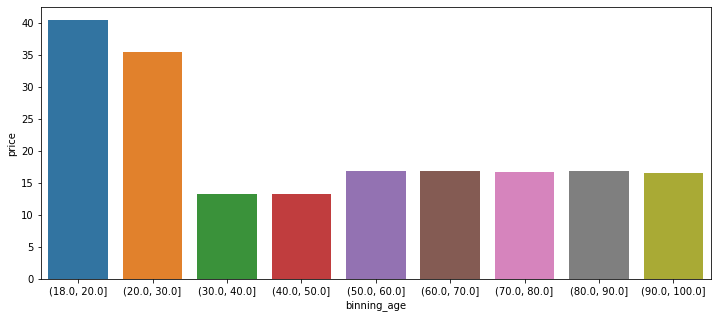

In [32]:
meanByUserAge = data.groupby(['binning_age']).mean()
meanByUserAge = meanByUserAge.reset_index()
meanByUserAge = meanByUserAge[['binning_age','price']] 
sumByUserAge = data.groupby(['binning_age']).sum()
sumByUserAge = sumByUserAge.reset_index()
sumByUserAge = sumByUserAge[['binning_age','order']] 
mergeTransacMeanPrice = meanByUserAge.merge(sumByUserAge, left_on='binning_age', right_on='binning_age')
plt.figure(figsize=[12,5])
sns.barplot(x="binning_age", y="price", data=mergeTransacMeanPrice, ci=68)


In [ ]:
#les plus commandes se font pour la tranches 18 30

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


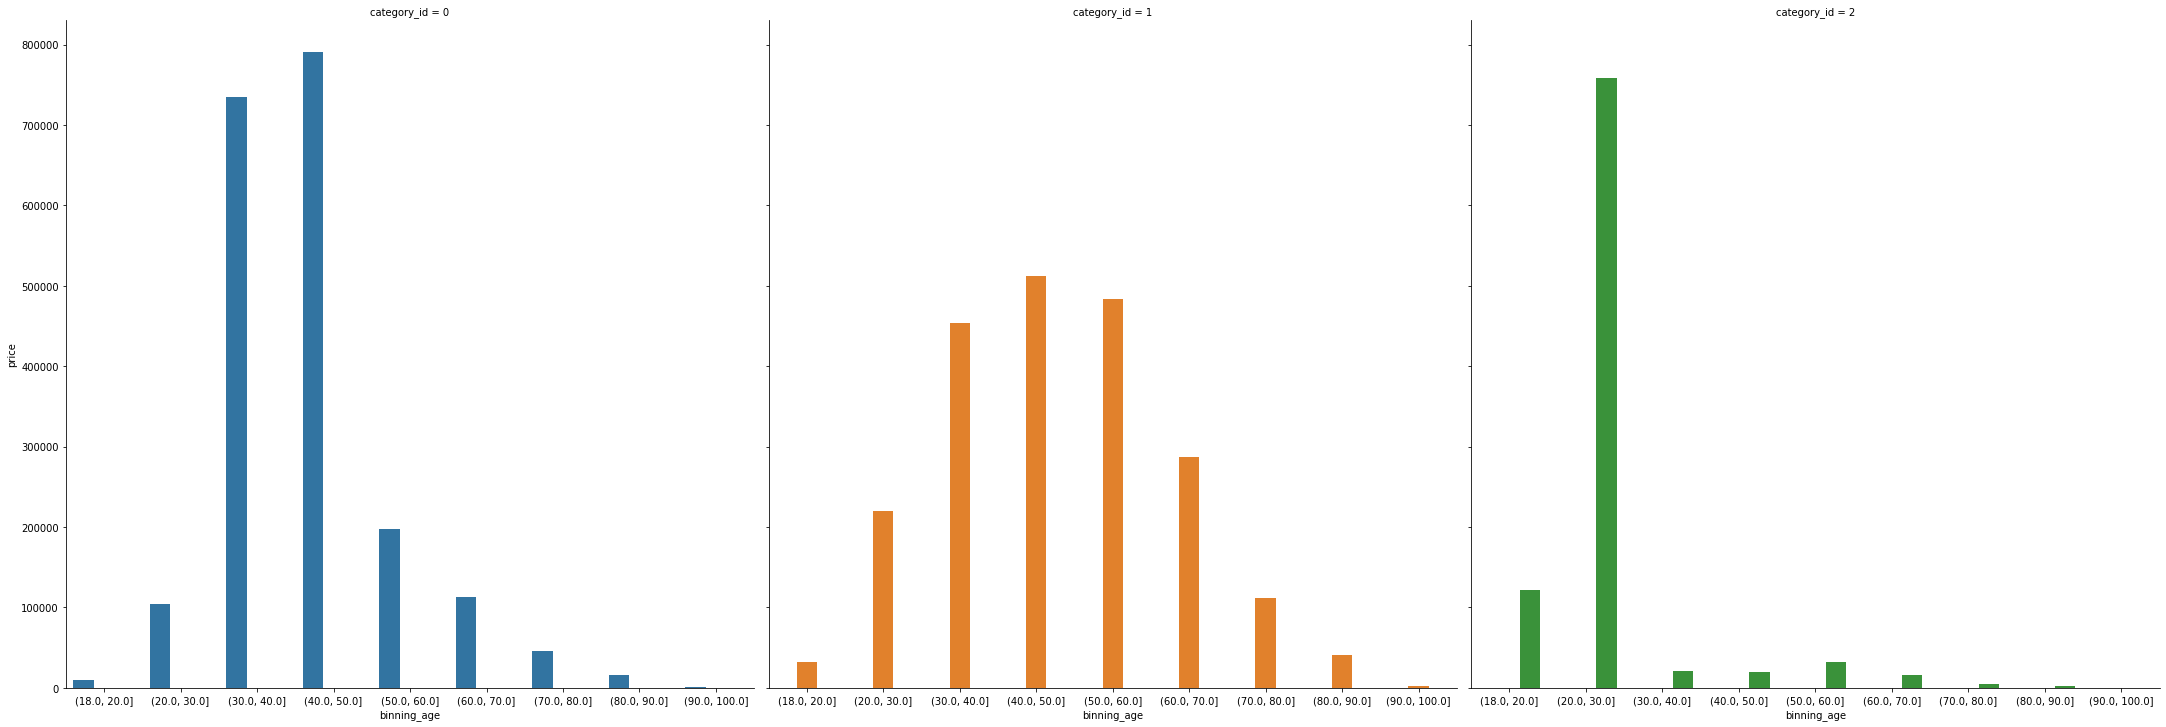

In [33]:
# non allon utiliser une analyse à 3 variables afin de connaitre la répartion des ages selon la catégorie

binningCategory = data.groupby(['binning_age','category_id']).sum()
binningCategory
binningCategory = binningCategory[['price']].reset_index()
binning_cat_plot = sns.factorplot(x='binning_age', y='price', hue='category_id', 
                        col='category_id', data=binningCategory.reset_index(), kind='bar',height=10)